___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: "%.3f" % x)
np.set_printoptions(suppress=True)

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from tensorflow.keras.models import load_model

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print('No. of training images is', X_train.shape[0], 'with a resolution of ' , X_train.shape[1], 'x', X_train.shape[1])
print('No. of testing images is', X_test.shape[0], 'with a resolution of ' , X_test.shape[1], 'x', X_test.shape[1])
print('No. of classes is', len(np.unique(y_test)))

No. of training images is 60000 with a resolution of  28 x 28
No. of testing images is 10000 with a resolution of  28 x 28
No. of classes is 10


In [ ]:
X_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

the images are in grayscale, where each image is represented as a 2-dimensional array of pixel values

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
# mapping y to labels
y_test_classes = np.vectorize(classes.get)(y_test)
y_train_classes = np.vectorize(classes.get)(y_train)

In [ ]:
y_train_classes[3]

'Dress'

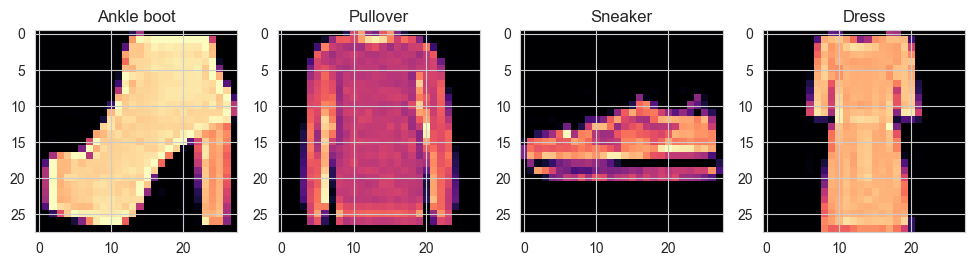

In [ ]:
# display 4 picture based on index
plt.figure(figsize=(12, 3))

for i in range(44, 48):
    plt.subplot(1, 4, i-43)
    plt.imshow(X_train[i], cmap='magma') # the colors are gray but I'm using colors for clear visuals
    plt.title(y_train_classes[i]) # to print class upove each figure

plt.show()

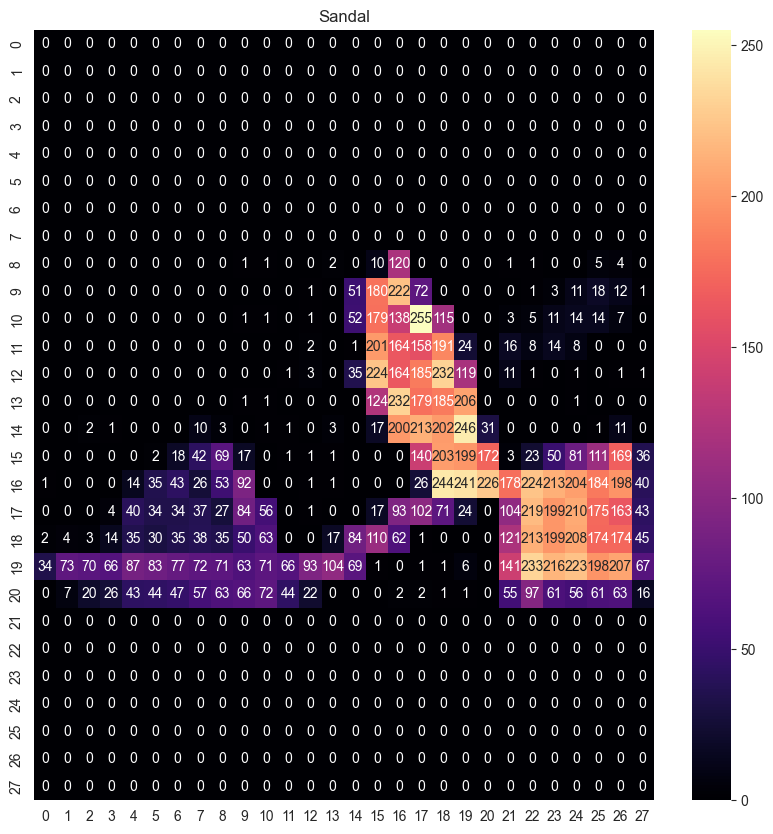

In [ ]:
# displaying random pic in heatmap format
plt.figure(figsize=(10, 10))
sns.heatmap(X_train[230],annot=True, cmap='magma', fmt='.3g')
plt.title(y_train_classes[230]);

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
X_train[300].max()

255

Why this step? to ensue that all values scaled within a consistent range before passing them to the model. <br>
Max normalization scales the pixel values to a range between 0 and 1, this normalization method ensures <br>
 that the maximum pixel value becomes 1, while all other pixel values are proportionally scaled down.

In [ ]:
# Max normalization
X_train = X_train.astype('float32') # from int to float
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[300].max()

1.0

In [ ]:
# creating validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.1,
                                                  stratify=y_train,
                                                  random_state=1010)

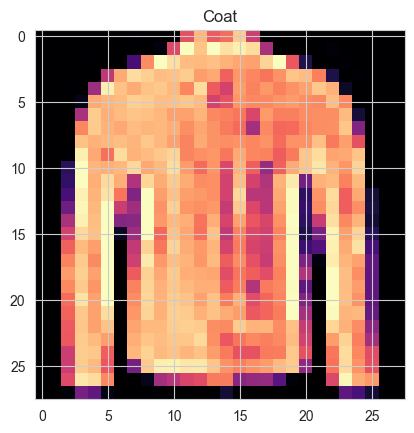

In [ ]:
plt.imshow(X_test[50], cmap='magma')
plt.title(y_test_classes[50])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
np.expand_dims(X_train, 3).shape

(54000, 28, 28, 1)

In [ ]:
# reshaping X
X_train = np.expand_dims(X_train, 3)
X_val = np.expand_dims(X_val, 3)
X_test = np.expand_dims(X_test, 3)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
# we have 10 classes to be encoded
y_train_enc = to_categorical(y_train, 10)
y_test_enc = to_categorical(y_test, 10)
y_val_enc = to_categorical(y_val, 10)
y_test_enc.shape

(10000, 10)

In [ ]:
y_test_enc[2] # one-hot encoded

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [ ]:
SEED = 101
import os
import random

def set_seed():
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

### Model 1 - suggested model

In [ ]:
# suggested CNN arch
set_seed()

model_1 = Sequential()

model_1.add(Conv2D(filters=28, kernel_size=(3, 3),
    input_shape=(28, 28, 1), activation='relu'))

model_1.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_1.add(Flatten())

model_1.add(Dense(128, activation='relu'))

model_1.add(Dense(10, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
early_stop = EarlyStopping(
    monitor='val_accuracy', # monitoring accuracy for now
    mode='max', # maximize
    patience=3,
    restore_best_weights=True
)

In [ ]:
model_1.fit(
    X_train,
    y_train_enc,
    batch_size = 64, # testing with 64
    epochs = 25,
    validation_data=(X_val, y_val_enc),# use validation set
    callbacks=[early_stop],
)

Epoch 1/25
844/844 [==============================] - 30s 35ms/step - loss: 0.4307 - accuracy: 0.8482 - val_loss: 0.2983 - val_accuracy: 0.8933
Epoch 2/25
844/844 [==============================] - 28s 33ms/step - loss: 0.2702 - accuracy: 0.9030 - val_loss: 0.2686 - val_accuracy: 0.9045
Epoch 3/25
844/844 [==============================] - 29s 35ms/step - loss: 0.2266 - accuracy: 0.9158 - val_loss: 0.2677 - val_accuracy: 0.9053
Epoch 4/25
844/844 [==============================] - 31s 37ms/step - loss: 0.1945 - accuracy: 0.9291 - val_loss: 0.2456 - val_accuracy: 0.9152
Epoch 5/25
844/844 [==============================] - 33s 39ms/step - loss: 0.1685 - accuracy: 0.9375 - val_loss: 0.2948 - val_accuracy: 0.9003
Epoch 6/25
844/844 [==============================] - 31s 37ms/step - loss: 0.1485 - accuracy: 0.9451 - val_loss: 0.2360 - val_accuracy: 0.9202
Epoch 7/25
844/844 [==============================] - 32s 37ms/step - loss: 0.1281 - accuracy: 0.9532 - val_loss: 0.2604 - val_accuracy:

In [ ]:
summary = pd.DataFrame(model_1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.431,0.848,0.298,0.893
1,0.270,0.903,0.269,0.905
2,0.227,0.916,0.268,0.905
3,0.195,0.929,0.246,0.915
4,0.168,0.937,0.295,0.900


In [ ]:
scores = pd.DataFrame(
    {'mean': summary.mean().values, 'std': summary.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.136,0.105
accuracy,0.951,0.038
val_loss,0.304,0.049
val_accuracy,0.914,0.009


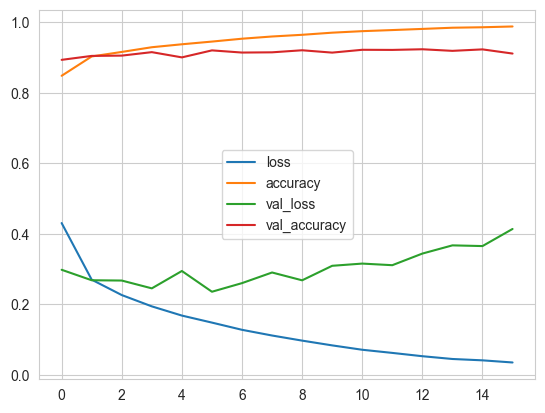

In [ ]:
results = pd.DataFrame(model_1.history.history)
results.plot();

The model is overfitting the data (the vall_los is higher)

### Model 2 - L1 reg

We are goning to test another arch and add L1 regularaization

In [ ]:
# alternative arch
set_seed()
model_2 = Sequential()

# 32 filters and L1 reg
model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l1(0.01))) #L1 penalty

model_2.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_2.add(Flatten())

model_2.add(Dense(128, activation='relu'))

model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']) # opt is Adam

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 20000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2560128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2561738 (9.77 MB)
Trainable params: 2561738 (9.77 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
early_stop2 = EarlyStopping(
    monitor='val_loss',
    mode='min', # minimize
    patience=3,
    restore_best_weights=True
)

In [ ]:
model_2.fit(
    X_train,
    y_train_enc,
    batch_size = 64,
    epochs = 25,
    validation_data=(X_val, y_val_enc),
    callbacks=[early_stop2], #loss vall
)

Epoch 1/25
844/844 [==============================] - 34s 39ms/step - loss: 0.5074 - accuracy: 0.8603 - val_loss: 0.3806 - val_accuracy: 0.8897
Epoch 2/25
844/844 [==============================] - 31s 37ms/step - loss: 0.3452 - accuracy: 0.8993 - val_loss: 0.3302 - val_accuracy: 0.9047
Epoch 3/25
844/844 [==============================] - 32s 38ms/step - loss: 0.3023 - accuracy: 0.9091 - val_loss: 0.3119 - val_accuracy: 0.9097
Epoch 4/25
844/844 [==============================] - 61s 73ms/step - loss: 0.2741 - accuracy: 0.9186 - val_loss: 0.2902 - val_accuracy: 0.9102
Epoch 5/25
844/844 [==============================] - 72s 85ms/step - loss: 0.2525 - accuracy: 0.9242 - val_loss: 0.2917 - val_accuracy: 0.9125
Epoch 6/25
844/844 [==============================] - 72s 85ms/step - loss: 0.2347 - accuracy: 0.9316 - val_loss: 0.2977 - val_accuracy: 0.9105
Epoch 7/25
844/844 [==============================] - 42s 49ms/step - loss: 0.2172 - accuracy: 0.9368 - val_loss: 0.2719 - val_accuracy:

In [ ]:
summary2 = pd.DataFrame(model_2.history.history)
summary2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.507,0.860,0.381,0.890
1,0.345,0.899,0.330,0.905
2,0.302,0.909,0.312,0.910
3,0.274,0.919,0.290,0.910
4,0.253,0.924,0.292,0.913


In [ ]:
scores = pd.DataFrame(
    {'mean': summary2.mean().values, 'std': summary2.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.270,0.098
accuracy,0.922,0.027
val_loss,0.303,0.033
val_accuracy,0.910,0.008


Slightly better results with L1

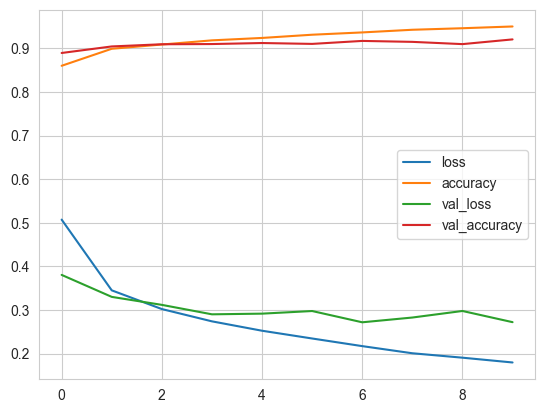

In [ ]:
results2 = pd.DataFrame(model_2.history.history)
results2.plot();

The model is better than before the loss can be improved

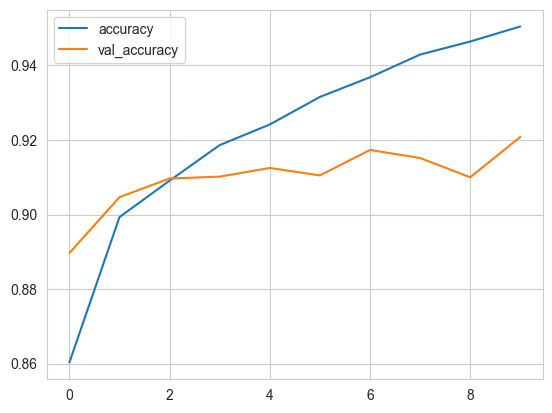

In [ ]:
summary2[['accuracy', 'val_accuracy']].plot();

The accuracy doesn't improve that much

### Model 3 - L2 reg

In [ ]:
# suggested CNN arch with L2 regularazation
set_seed()
model_3 = Sequential()

model_3.add(Conv2D(filters=28, kernel_size=(3, 3),kernel_regularizer=tf.keras.regularizers.l2(0.05),
    input_shape=(28, 28, 1), activation='relu'))

model_3.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_3.add(Flatten())

model_3.add(Dense(128, activation='relu'))

model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 17500)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2240128   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model_3.fit(
    X_train,
    y_train_enc,
    batch_size = 64,
    epochs = 25,
    validation_data=(X_val, y_val_enc),
    callbacks=[early_stop2],
)

Epoch 1/25
844/844 [==============================] - 30s 34ms/step - loss: 0.5056 - accuracy: 0.8420 - val_loss: 0.3610 - val_accuracy: 0.8850
Epoch 2/25
844/844 [==============================] - 28s 34ms/step - loss: 0.3323 - accuracy: 0.8931 - val_loss: 0.3090 - val_accuracy: 0.9003
Epoch 3/25
844/844 [==============================] - 29s 34ms/step - loss: 0.2903 - accuracy: 0.9020 - val_loss: 0.3196 - val_accuracy: 0.8943
Epoch 4/25
844/844 [==============================] - 30s 35ms/step - loss: 0.2626 - accuracy: 0.9126 - val_loss: 0.3088 - val_accuracy: 0.8962
Epoch 5/25
844/844 [==============================] - 30s 36ms/step - loss: 0.2419 - accuracy: 0.9187 - val_loss: 0.3215 - val_accuracy: 0.8888
Epoch 6/25
844/844 [==============================] - 31s 37ms/step - loss: 0.2250 - accuracy: 0.9239 - val_loss: 0.2601 - val_accuracy: 0.9125
Epoch 7/25
844/844 [==============================] - 32s 37ms/step - loss: 0.2097 - accuracy: 0.9302 - val_loss: 0.2527 - val_accuracy:

In [ ]:
summary3 = pd.DataFrame(model_3.history.history)
summary3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.506,0.842,0.361,0.885
1,0.332,0.893,0.309,0.900
2,0.290,0.902,0.320,0.894
3,0.263,0.913,0.309,0.896
4,0.242,0.919,0.322,0.889


In [ ]:
scores = pd.DataFrame(
    {'mean': summary3.mean().values, 'std': summary3.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.253,0.098
accuracy,0.917,0.030
val_loss,0.288,0.037
val_accuracy,0.905,0.012


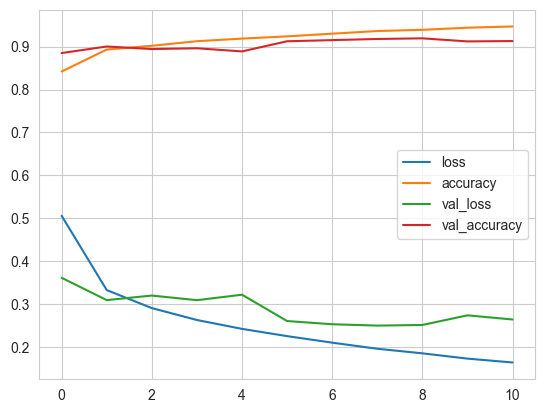

In [ ]:
results3 = pd.DataFrame(model_3.history.history)
results3.plot();

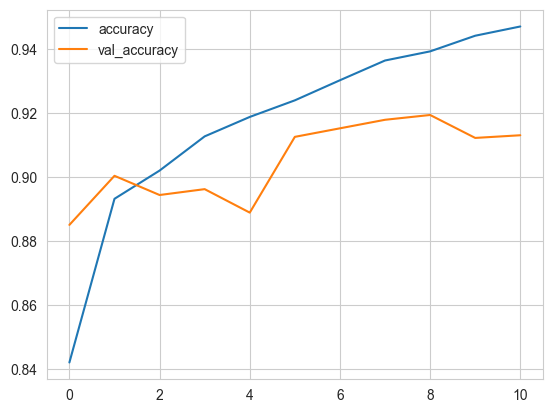

In [ ]:
summary3[['accuracy', 'val_accuracy']].plot();

The scores are bit close but can be further improved

### Model 4 - L1 (0.03) with droupouts

In [ ]:
# alternative arch 2
set_seed()
model_4 = Sequential()

# 64 filters and L1 reg
model_4.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l1(0.03)))

model_4.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_4.add(Flatten())

model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.5))  # adding droup out
model_4.add(Dense(32, activation='relu')) # adding layer
model_4.add(Dropout(0.2))  # adding droup out
model_4.add(Dense(10, activation='softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']) # opt is Adam

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 40000)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               5120128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                      

In [ ]:
model_4.fit(
    X_train,
    y_train_enc,
    batch_size = 64,
    epochs = 25,
    validation_data=(X_val, y_val_enc),
    callbacks=[early_stop2],
)

Epoch 1/25
844/844 [==============================] - 62s 71ms/step - loss: 0.9386 - accuracy: 0.7293 - val_loss: 0.5211 - val_accuracy: 0.8488
Epoch 2/25
844/844 [==============================] - 61s 72ms/step - loss: 0.5893 - accuracy: 0.8244 - val_loss: 0.4259 - val_accuracy: 0.8768
Epoch 3/25
844/844 [==============================] - 63s 75ms/step - loss: 0.5081 - accuracy: 0.8477 - val_loss: 0.3920 - val_accuracy: 0.8835
Epoch 4/25
844/844 [==============================] - 65s 78ms/step - loss: 0.4641 - accuracy: 0.8596 - val_loss: 0.3545 - val_accuracy: 0.8920
Epoch 5/25
844/844 [==============================] - 106s 125ms/step - loss: 0.4342 - accuracy: 0.8670 - val_loss: 0.3492 - val_accuracy: 0.8910
Epoch 6/25
844/844 [==============================] - 87s 103ms/step - loss: 0.4121 - accuracy: 0.8732 - val_loss: 0.3376 - val_accuracy: 0.8945
Epoch 7/25
844/844 [==============================] - 59s 70ms/step - loss: 0.3975 - accuracy: 0.8783 - val_loss: 0.3319 - val_accura

In [ ]:
summary4 = pd.DataFrame(model_4.history.history)
summary4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.939,0.729,0.521,0.849
1,0.589,0.824,0.426,0.877
2,0.508,0.848,0.392,0.883
3,0.464,0.860,0.354,0.892
4,0.434,0.867,0.349,0.891


In [ ]:
scores = pd.DataFrame(
    {'mean': summary4.mean().values, 'std': summary4.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.419,0.148
accuracy,0.872,0.041
val_loss,0.341,0.056
val_accuracy,0.896,0.014


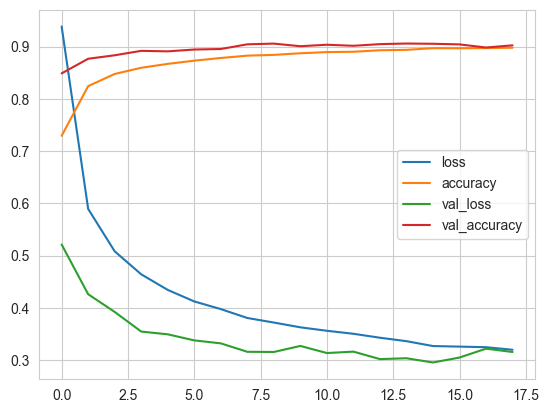

In [ ]:
results4 = pd.DataFrame(model_4.history.history)
results4.plot();

The scores are more consistient and val_loss looks good

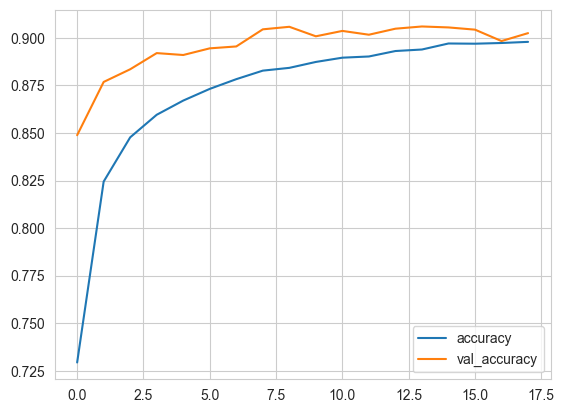

In [ ]:
summary4[['accuracy', 'val_accuracy']].plot();

The val_accuracy is higher than train accuracy

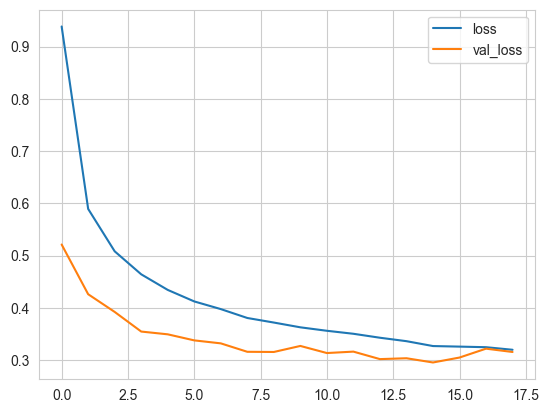

In [ ]:
summary4[['loss', 'val_loss']].plot();

### Model 5 - L1 (0.02) with more layers and dropouts

In [ ]:
# hopefully it's the last model -_-
set_seed()
model_5 = Sequential()

# 32 filters and L1
model_5.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l1(0.02)))

model_5.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_5.add(Flatten())

model_5.add(Dense(128, activation='relu'))
model_5.add(Dropout(0.4))  # adding droup out
model_5.add(Dense(32, activation='relu')) # adding layer
model_5.add(Dropout(0.2))  # adding droup out
model_5.add(Dense(10, activation='softmax'))

model_5.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy']) # opt rmsprop

In [ ]:
model_5.fit(
    X_train,
    y_train_enc,
    batch_size = 64,
    epochs = 25,
    validation_data=(X_val, y_val_enc),
    callbacks=[early_stop2],
)

Epoch 1/25
844/844 [==============================] - 50s 58ms/step - loss: 0.8856 - accuracy: 0.7387 - val_loss: 0.4978 - val_accuracy: 0.8517
Epoch 2/25
844/844 [==============================] - 65s 76ms/step - loss: 0.5493 - accuracy: 0.8348 - val_loss: 0.3999 - val_accuracy: 0.8752
Epoch 3/25
844/844 [==============================] - 41s 49ms/step - loss: 0.4646 - accuracy: 0.8570 - val_loss: 0.3769 - val_accuracy: 0.8832
Epoch 4/25
844/844 [==============================] - 40s 47ms/step - loss: 0.4245 - accuracy: 0.8703 - val_loss: 0.3382 - val_accuracy: 0.8962
Epoch 5/25
844/844 [==============================] - 39s 46ms/step - loss: 0.3967 - accuracy: 0.8765 - val_loss: 0.3508 - val_accuracy: 0.8852
Epoch 6/25
844/844 [==============================] - 37s 44ms/step - loss: 0.3791 - accuracy: 0.8816 - val_loss: 0.3304 - val_accuracy: 0.8935
Epoch 7/25
844/844 [==============================] - 36s 43ms/step - loss: 0.3651 - accuracy: 0.8849 - val_loss: 0.3263 - val_accuracy:

In [ ]:
summary5 = pd.DataFrame(model_5.history.history)
summary5.head()

,loss,accuracy,val_loss,val_accuracy
0,0.886,0.739,0.498,0.852
1,0.549,0.835,0.400,0.875
2,0.465,0.857,0.377,0.883
3,0.424,0.870,0.338,0.896
4,0.397,0.877,0.351,0.885


In [ ]:
scores = pd.DataFrame(
    {'mean': summary5.mean().values, 'std': summary5.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.439,0.162
accuracy,0.865,0.045
val_loss,0.351,0.057
val_accuracy,0.890,0.016


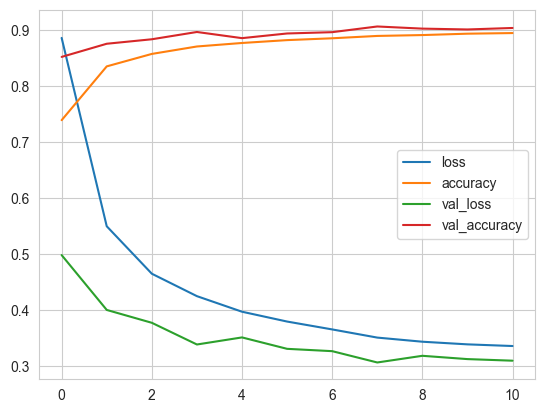

In [ ]:
results5 = pd.DataFrame(model_5.history.history)
results5.plot();

the validation score are higher than train

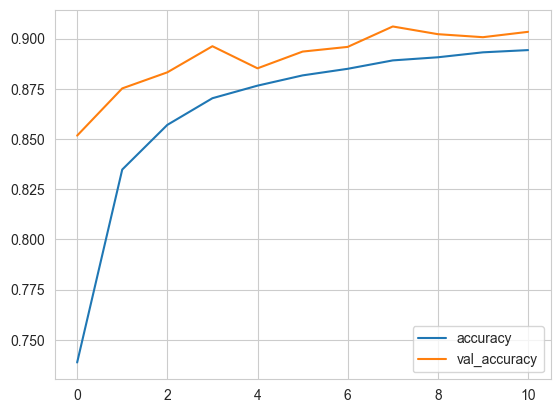

In [ ]:
summary5[['accuracy', 'val_accuracy']].plot();

### Model 6 - L1 (0.03) with droupouts and alt arch

In [ ]:
# last model
set_seed()
model_6 = Sequential()

# 64 filters
model_6.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l1(0.03)))

model_6.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_6.add(Flatten())

model_6.add(Dense(128, activation='relu'))
model_6.add(Dropout(0.4))  # adding droup out
model_6.add(Dense(64, activation='relu')) # adding layer
model_6.add(Dropout(0.2))  # adding droup out
model_6.add(Dense(10, activation='softmax'))

model_6.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']) # opt is Adam

In [ ]:
model_6.fit(
    X_train,
    y_train_enc,
    batch_size = 64,
    epochs = 25,
    validation_data=(X_val, y_val_enc),
    callbacks=[early_stop2],
)

Epoch 1/25
844/844 [==============================] - 70s 81ms/step - loss: 0.8343 - accuracy: 0.7656 - val_loss: 0.4761 - val_accuracy: 0.8640
Epoch 2/25
844/844 [==============================] - 114s 135ms/step - loss: 0.5103 - accuracy: 0.8499 - val_loss: 0.3939 - val_accuracy: 0.8842
Epoch 3/25
844/844 [==============================] - 105s 125ms/step - loss: 0.4369 - accuracy: 0.8687 - val_loss: 0.3613 - val_accuracy: 0.8950
Epoch 4/25
844/844 [==============================] - 77s 91ms/step - loss: 0.4001 - accuracy: 0.8783 - val_loss: 0.3423 - val_accuracy: 0.8945
Epoch 5/25
844/844 [==============================] - 86s 102ms/step - loss: 0.3758 - accuracy: 0.8824 - val_loss: 0.3332 - val_accuracy: 0.8987
Epoch 6/25
844/844 [==============================] - 109s 129ms/step - loss: 0.3562 - accuracy: 0.8893 - val_loss: 0.3132 - val_accuracy: 0.9053
Epoch 7/25
844/844 [==============================] - 76s 90ms/step - loss: 0.3435 - accuracy: 0.8920 - val_loss: 0.3104 - val_ac

In [ ]:
summary6 = pd.DataFrame(model_6.history.history)
summary6.head()

,loss,accuracy,val_loss,val_accuracy
0,0.834,0.766,0.476,0.864
1,0.510,0.850,0.394,0.884
2,0.437,0.869,0.361,0.895
3,0.400,0.878,0.342,0.895
4,0.376,0.882,0.333,0.899


In [ ]:
scores = pd.DataFrame(
    {'mean': summary6.mean().values, 'std': summary6.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.385,0.144
accuracy,0.882,0.037
val_loss,0.329,0.052
val_accuracy,0.899,0.012


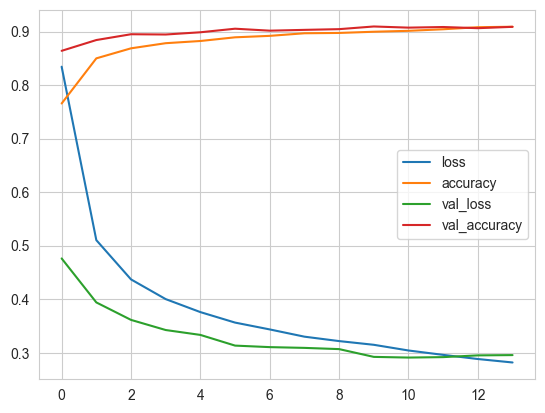

In [ ]:
results6 = pd.DataFrame(model_6.history.history)
results6.plot();

The results for model 6 looks good, now let's compare the models

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

### Models comparison

In [ ]:
m1 = summary.mean().values
m2 = summary2.mean().values
m3 = summary3.mean().values
m4 = summary4.mean().values
m5 = summary5.mean().values
m6 = summary6.mean().values

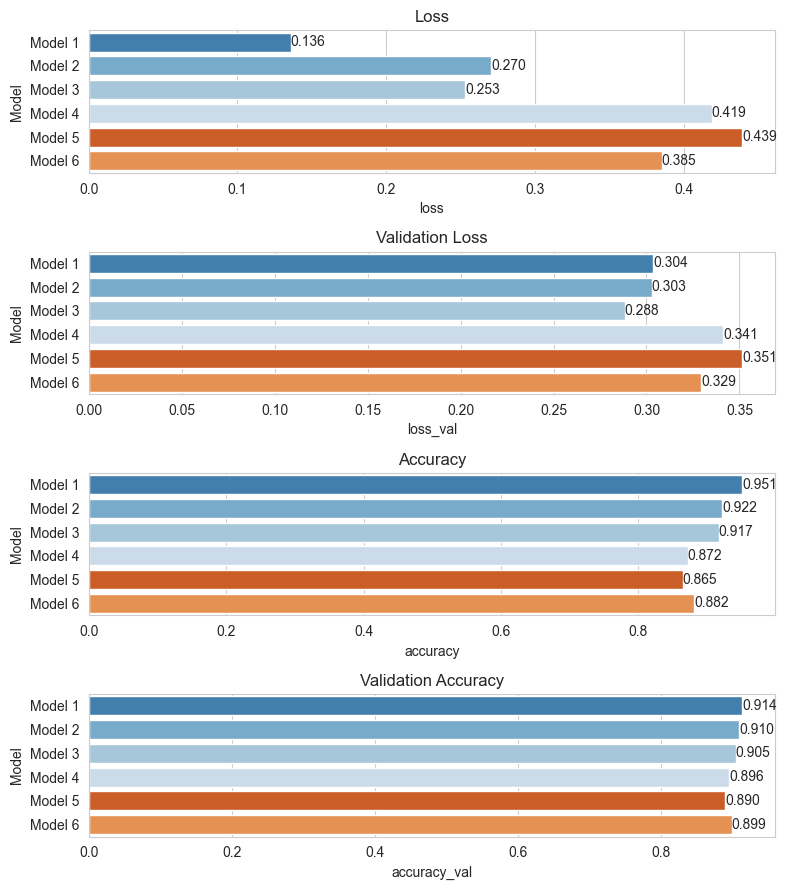

In [ ]:
compare = pd.DataFrame(
    {
        'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'],
        'loss': [m1[0], m2[0],m3[0],m4[0], m5[0],m6[0]],
        'loss_val': [m1[2], m2[2],m3[2],m4[2],m5[2],m6[2]],
        'accuracy': [m1[1], m2[1],m3[1],m4[1],m5[1],m6[1]],
        'accuracy_val': [m1[3], m2[3],m3[3],m4[3],m5[3],m6[3]],

    }
)


plt.figure(figsize=(8, 9))
plt.subplot(411)
ax = sns.barplot(x='loss', y='Model', data=compare, palette='tab20c')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title('Loss')

plt.subplot(412)
ax = sns.barplot(x='loss_val', y='Model', data=compare, palette='tab20c')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title('Validation Loss')

plt.subplot(413)
ax = sns.barplot(x='accuracy', y='Model', data=compare, palette='tab20c')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title('Accuracy')

plt.subplot(414)
ax = sns.barplot(x='accuracy_val', y='Model', data=compare, palette='tab20c')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title('Validation Accuracy')
plt.tight_layout()
plt.show();

- Model 1 is overfitting (high loss on validation)
- Model 2 validation scores are very close to train scores but slightly overfitting
- Model 3 has higher accuracy validation scores but the train loss is high
- Model 4 has lower loss_val and higher accuracy_val
- Model 5 also has low loss_val and high accuracy_val
- Model 6 has lower loss_val than model 4 & 5 and higher accuracy_val

In [ ]:
# models performance on test set
acc_scores = pd.DataFrame(
    {'Model 1': model_1.evaluate(X_test, y_test_enc, verbose=0),
     'Model 2': model_2.evaluate(X_test, y_test_enc, verbose=0),
     'Model 3': model_3.evaluate(X_test, y_test_enc, verbose=0),
     'Model 4': model_4.evaluate(X_test, y_test_enc, verbose=0),
     'Model 5': model_5.evaluate(X_test, y_test_enc, verbose=0),
     'Model 6': model_6.evaluate(X_test, y_test_enc, verbose=0)},
     index=['test loss', 'test accuracy'],
)
acc_scores

,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
test loss,0.365,0.295,0.273,0.318,0.331,0.316
test accuracy,0.915,0.909,0.909,0.902,0.892,0.898


- Model 1 has the highest loss
- Model 2 and 3 showed great results
- Model 3 has the lowest loss and high accuracy score so it will be our final choice but we need to further examine the classes performance

In [ ]:
y_pred = model_3.predict(X_test, verbose=0)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred,zero_division=False))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.85      0.85      1000
           3       0.89      0.92      0.90      1000
           4       0.87      0.83      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.74      0.76      0.75      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



class 6 has lower f1 score compared to other classes

In [ ]:
conv_mat = confusion_matrix(y_test, y_pred)

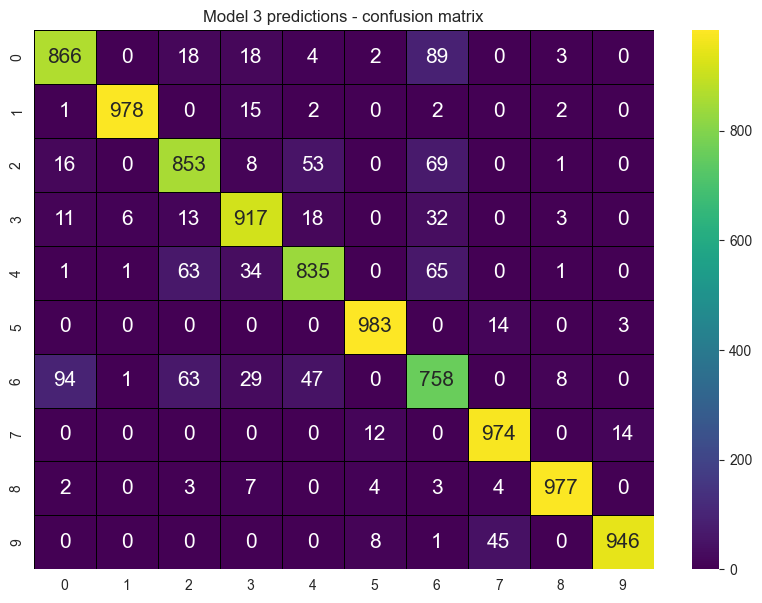

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    conv_mat,
    annot=True,
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
    fmt='g',
    annot_kws={"size": 15},
)
plt.title('Model 3 predictions - confusion matrix')
plt.show()

In [ ]:
np.not_equal(y_test, y_pred).sum()

913

In [ ]:
np.equal(y_test, y_pred).sum()

9087

The model has misclassified around 10% of the testing set

Class 6 is mostly missclasified with classes {0,2,4}

In [ ]:
print('Class 6:', classes[6])
print('Class 0:', classes[0])
print('Class 2:', classes[2])
print('Class 4:', classes[4])

Class 6: Shirt
Class 0: T-shirt/top
Class 2: Pullover
Class 4: Coat


The model has confused class shirt with similar pieces (similar pixels shape) but overall the ability of the model to distinguish images is very good.

### AUC-ROC curve

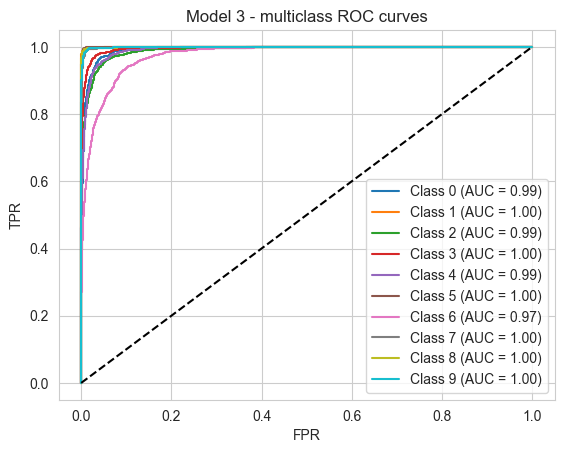

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model_3.predict(X_test, verbose=0)
n = 10
fpr = dict()
tpr = dict()
roc_auc = dict()

# to calculate auc score for each class
for i in range(n):
    fpr[i], tpr[i], _ = roc_curve(y_test_enc[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Model 3 - multiclass ROC curves')
plt.legend(loc='lower right')
plt.show()

This means that we have a perfect classifier :)

## Prediction

### Saving the model

In [ ]:
model_3.save('classify-images.keras')

In [ ]:
model = load_model('classify-images.keras')

In [ ]:
item = X_test[14]
item.shape

(28, 28, 1)

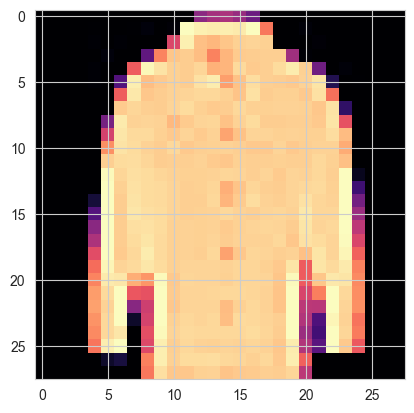

In [ ]:
# sample img for prediction
plt.imshow(item, cmap='magma')
plt.show()

In [ ]:
pred_prob = model.predict(np.expand_dims(item, 0))
pred_prob

1/1 [==============================] - 0s 82ms/step


array([[0.00000643, 0.00000212, 0.14031883, 0.00000178, 0.8539322 ,
        0.00000032, 0.00569998, 0.00000033, 0.00002558, 0.00001235]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(pred_prob)

In [ ]:
print(f'The model predicted that item belongs to class {y_pred} which is {classes[y_pred]}')

The model predicted that item belongs to class 4 which is Coat


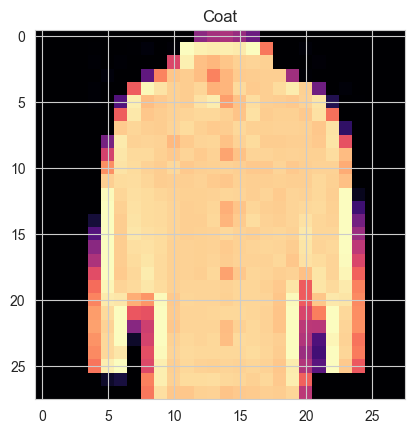

In [ ]:
plt.imshow(item, cmap='magma')
plt.title(y_test_classes[14])
plt.show()

Correct prediction!

In [ ]:
pred_prob = model.predict(np.expand_dims(X_test[65], 0))

1/1 [==============================] - 0s 34ms/step


In [ ]:
y_pred = np.argmax(pred_prob)
print(f'The model predicted that item belongs to class {y_pred} which is {classes[y_pred]}')

The model predicted that item belongs to class 1 which is Trouser


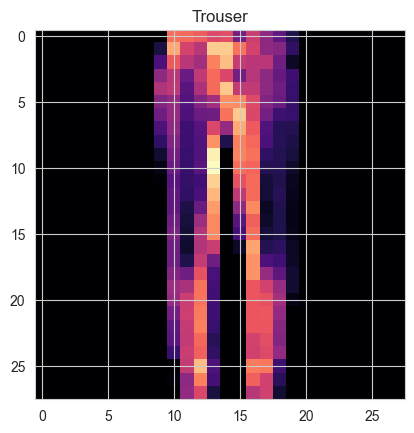

In [ ]:
plt.imshow(X_test[65], cmap='magma')
plt.title(y_test_classes[65])
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___